# BB84 protocol.

## Objective; Transfer 15 bits data from Alice to bob
https://en.wikipedia.org/wiki/BB84

In [90]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import random 

def measure_and_count(circuit, N):
    for i in range(N):
        circuit.measure(i, i)
    sim = Aer.get_backend('aer_simulator')
    job = execute(circuit, sim)
    result = job.result()
    counts = result.get_counts()
    return counts

### Generate a 32 bit key for transfer using random choices python library.

In [91]:
count = 0
import time

while (count < 30):
    time.sleep(1)
    count += 1
    KeyRandom = random.choices([0,1], k=16)
    KeyToBeTransimtted = "".join([str(a) for a in KeyRandom])

    print (KeyToBeTransimtted, len(KeyToBeTransimtted))

    N = len(KeyToBeTransimtted)
    BobFullKeyReceived = False 
    BobsKey = [-1]*N
    iterations = 0 
    state = None

    for i in range(2*N):
        QuantumBB84Circuit = QuantumCircuit(N,N)
        for idx, i in enumerate(KeyToBeTransimtted):
            if i == "1":
                QuantumBB84Circuit.x(idx)

        QuantumBB84Circuit.barrier()

        # Alice choses a basis randomly.
        alice_basis_choice = random.choices([0,1], k=N)
        for idx, c in enumerate(alice_basis_choice):
            if c == 1:
                QuantumBB84Circuit.h(idx)

        QuantumBB84Circuit.barrier()

        # Bob choses a basis randomly.
        bob_basis_choice = random.choices([0,1], k=N)
        for idx, c in enumerate(bob_basis_choice):
            if c == 1:
                QuantumBB84Circuit.h(idx)
                
        QuantumBB84Circuit.barrier()

        z = measure_and_count(QuantumBB84Circuit, N)
        
        ## publicly share alice and bob basis.
        reference = list(z.keys())
        reference = [k[::-1] for k in reference]

        def get_all_values_at_index(reference, bit_no): 
            ans = reference[0][bit_no]

            for i in range(1, len(reference)):
                if ans != reference[i][bit_no]:
                    return -1
            
            return ans 

        for idx, (alice_choice, bob_choice) in enumerate(zip(alice_basis_choice, bob_basis_choice)):
            if alice_choice == bob_choice:
                ans = get_all_values_at_index(reference, idx)
                if BobsKey[idx] == -1 and ans != -1:
                    BobsKey[idx] = ans

        iterations += 1

        state = QuantumBB84Circuit

        if -1 not in BobsKey:
            break

    print("Alice key =>", KeyToBeTransimtted, "\nBobs  key =>", "".join(BobsKey), '\nretrieved in' , iterations, 'iterations')

    import socket

    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    host ="localhost"
    port = 6791
    s.connect((host,port))
    s.send(KeyToBeTransimtted.encode()) 
    s.close()

    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    host ="localhost"
    port = 6792
    s.connect((host,port))
    s.send("".join(BobsKey).encode()) 
    s.close()


0111010100100111 16
Alice key => 0111010100100111 
Bobs  key => 0111010100100111 
retrieved in 9 iterations
0000101011111101 16
Alice key => 0000101011111101 
Bobs  key => 0000101011111101 
retrieved in 5 iterations
1100000010100000 16
Alice key => 1100000010100000 
Bobs  key => 1100000010100000 
retrieved in 4 iterations
0100100010101100 16
Alice key => 0100100010101100 
Bobs  key => 0100100010101100 
retrieved in 6 iterations
0100101000000100 16
Alice key => 0100101000000100 
Bobs  key => 0100101000000100 
retrieved in 4 iterations
1000111111111011 16
Alice key => 1000111111111011 
Bobs  key => 1000111111111011 
retrieved in 4 iterations
0101011000011111 16
Alice key => 0101011000011111 
Bobs  key => 0101011000011111 
retrieved in 5 iterations
1101101101010000 16
Alice key => 1101101101010000 
Bobs  key => 1101101101010000 
retrieved in 4 iterations
1000101011011100 16
Alice key => 1000101011011100 
Bobs  key => 1000101011011100 
retrieved in 6 iterations
1101001111101000 16
Alice ke

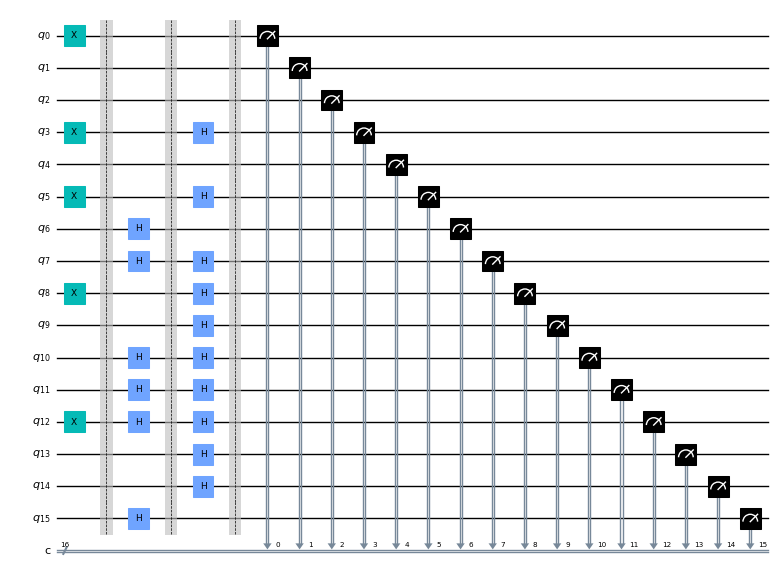

In [92]:
state.draw(output="mpl", scale=0.5, fold=1000)